# New York City AirBnB Open Data

Welcome to my notebook! Here I will be visualizing the NYC AirBnB dataset uploader by user @dgmonov.
Here I will be providing some exploratory analysis and attempt some machine learning on the dataset.
Please upvote if you find it useful at all and leave me a comment if you have anything you'd like to add!

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from uszipcode import Zipcode
from uszipcode import SearchEngine

sns.set()

In [3]:
airb = pd.read_csv('AB_NYC_2019.csv')
airb.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [321]:
# count how many features and observations we have
airb.shape

(48895, 16)

In [322]:
# see what type of data we're working with
airb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [8]:
# check for missing values
airb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [350]:
airb.number_of_reviews.describe()

count    48895.000000
mean        23.274466
std         44.550582
min          0.000000
25%          1.000000
50%          5.000000
75%         24.000000
max        629.000000
Name: number_of_reviews, dtype: float64

In [14]:
# split into hot encoding
airb['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [16]:
# possible drop?
airb['last_review'].unique()

array(['2018-10-19', '2019-05-21', nan, ..., '2017-12-23', '2018-01-29',
       '2018-03-29'], dtype=object)

In [323]:
# turn these into zipcodes. import library to do so
#airb['neighbourhood'].unique()

In [19]:
# one-hot encoding, name/no name?
airb['host_name'].unique()

array(['John', 'Jennifer', 'Elisabeth', ..., 'Abayomi', 'Alberth',
       'Ilgar & Aysel'], dtype=object)

In [324]:
# impute nan values for reviews_per_month and last_review with 0
#airb[['number_of_reviews','last_review','reviews_per_month']]

In [325]:
# replace each with year instead of date
# makes it easier for sorting
#airb['last_review'].sort_values(ascending=True)

In [20]:
# 6658 with 2 listings
# 2853 with 3 listings
# 1440 with 4 listings

#airb.loc[airb.calculated_host_listings_count >=5]

# Exploratory Analysis

### Let's begin our exploratory analysis with some data visualizations.

Almost all of the numerical features of this dataset do not look so great by just entering them through a histogram as they are. To get a better picture, the numerical data was split up into bins for each feature, better representing the data on each observation.

## 1) Price

In [41]:
price = {"<= $50":0, "$51-$75":0, "$76-$100":0,"$101-$150":0, 
                      "$151-$200":0,"$201-$300":0, "> $300":0}

for value in airb['price']:
    if value <= 50:
        price["<= $50"] += 1
    elif value > 50 and value <= 75:
        price['$51-$75'] += 1
    elif value > 75 and value <=100:
        price["$76-$100"] += 1
    elif value > 100 and value <=150:
        price["$101-$150"] += 1
    elif value > 150 and value <=200:
        price["$151-$200"] += 1
    elif value > 200 and value <=300:
        price["$201-$300"] += 1
    else:
        price["> $300"] += 1
#print(price)

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64


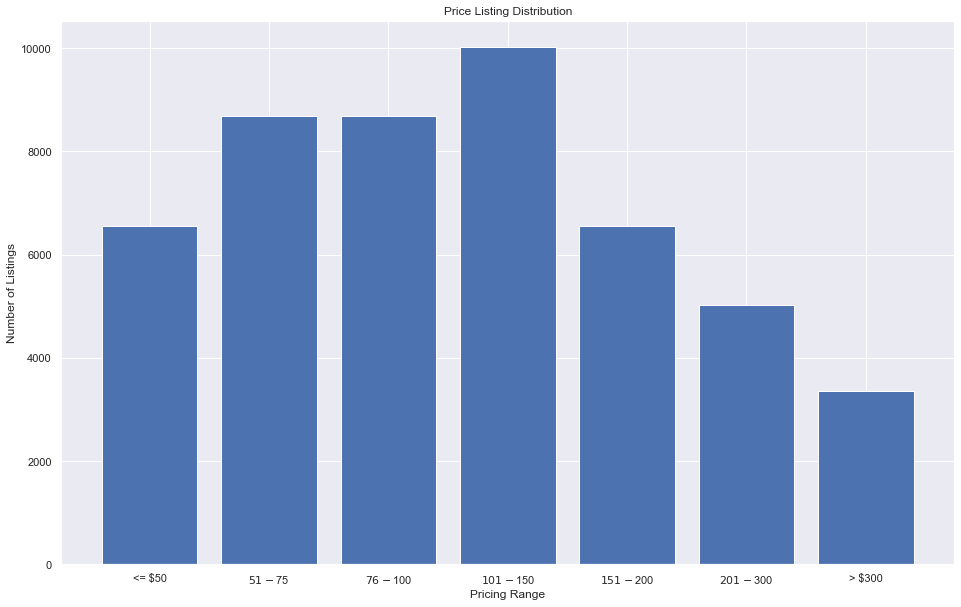

In [42]:
plt.figure(figsize=(16,10))

plt.bar(range(len(price)), list(price.values()))
plt.xticks(range(len(price)), list(price.keys()))
plt.ylabel('Number of Listings')
plt.xlabel('Pricing Range')
plt.title('Price Listing Distribution')

print(airb.price.describe())
plt.show()

#### Right away we notice that our highest bin is the price range of 101-150.

## 2) Minimum Nights

In [5]:
min_nights = {"1 Night":0, "2 Nights":0, "3 Nights":0,"4-7 Nights":0, "8-14 Nights":0,"15-30 Nights":0, "Over 30 Nights":0}

for value in airb['minimum_nights']:
    if value == 1:
        min_nights["1 Night"] += 1
    elif value == 2:
        min_nights["2 Nights"] += 1
    elif value == 3:
        min_nights["3 Nights"] += 1
    elif value >=4 and value <= 7:
        min_nights["4-7 Nights"] += 1
    elif value >= 8 and value <=14:
        min_nights["8-14 Nights"] += 1
    elif value >= 15 and value <=30:
        min_nights["15-30 Nights"] += 1
    else:
        min_nights["Over 30 Nights"] += 1
        
#print(min_nights)

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64


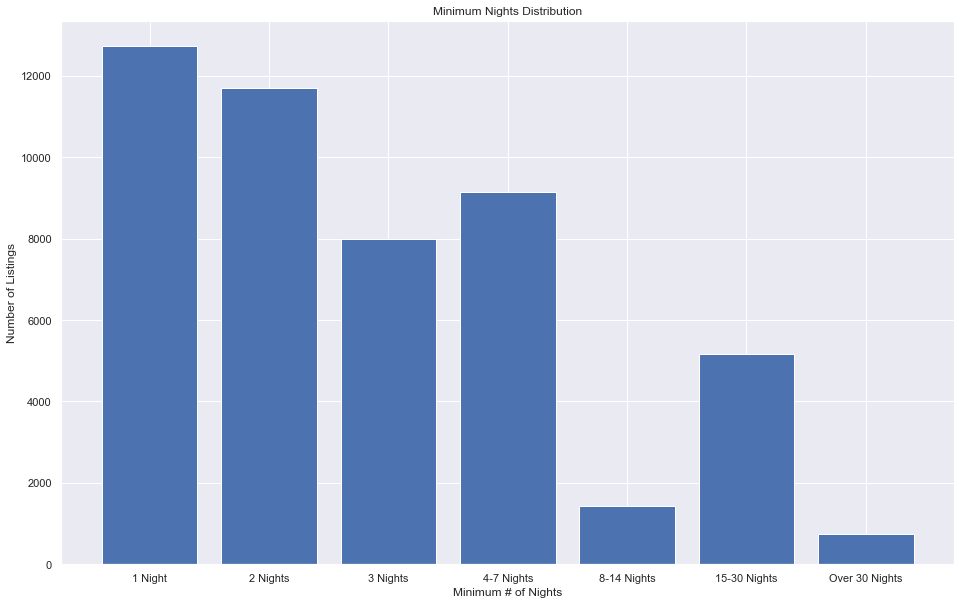

In [332]:
plt.figure(figsize=(16,10))

plt.bar(range(len(min_nights)), list(min_nights.values()))
plt.xticks(range(len(min_nights)), list(min_nights.keys()))
plt.ylabel('Number of Listings')
plt.xlabel('Minimum # of Nights')
plt.title('Minimum Nights Distribution')

print(airb.minimum_nights.describe())
plt.show()

#### It's probably safe to say that most hosts want their guests to stay at least one night.

## 3) Availability 365

In [6]:
availability_365 = {"0 Days":0, "<= 7 Days":0, "8-14 Days":0,"15-30 Days":0, 
              "31-60 Days":0,"61-90 Days":0, "91-120 Days":0, "121-150 Days":0,
             "151-180 Days":0, "181-210 Days":0, "211-240 Days":0, "241-270 Days":0,
             "271-300 Days":0, "301-330 Days":0, "331-365 Days":0}

for value in airb['availability_365']:
    if value == 0:
        availability_365["0 Days"] += 1
    elif value > 0 and value <= 7:
        availability_365["<= 7 Days"] += 1
    elif value > 7 and value <= 14:
        availability_365["8-14 Days"] += 1
    elif value > 14 and value <= 30:
        availability_365["15-30 Days"] += 1
    elif value > 30 and value <=60:
        availability_365["31-60 Days"] += 1
    elif value > 60 and value <=90:
        availability_365["61-90 Days"] += 1
    elif value > 91 and value <=120:
        availability_365["91-120 Days"] += 1
    elif value > 121 and value <=150:
        availability_365["121-150 Days"] += 1
    elif value > 151 and value <=180:
        availability_365["151-180 Days"] += 1
    elif value > 181 and value <=210:
        availability_365["181-210 Days"] += 1
    elif value > 211 and value <=240:
        availability_365["211-240 Days"] += 1
    elif value > 241 and value <=270:
        availability_365["241-270 Days"] += 1
    elif value > 271 and value <=300:
        availability_365["271-300 Days"] += 1
    elif value > 301 and value <=330:
        availability_365["301-330 Days"] += 1    
    else:
        availability_365["331-365 Days"] += 1
        
#print(availability_365)

count    48895.000000
mean       112.781327
std        131.622289
min          0.000000
25%          0.000000
50%         45.000000
75%        227.000000
max        365.000000
Name: availability_365, dtype: float64


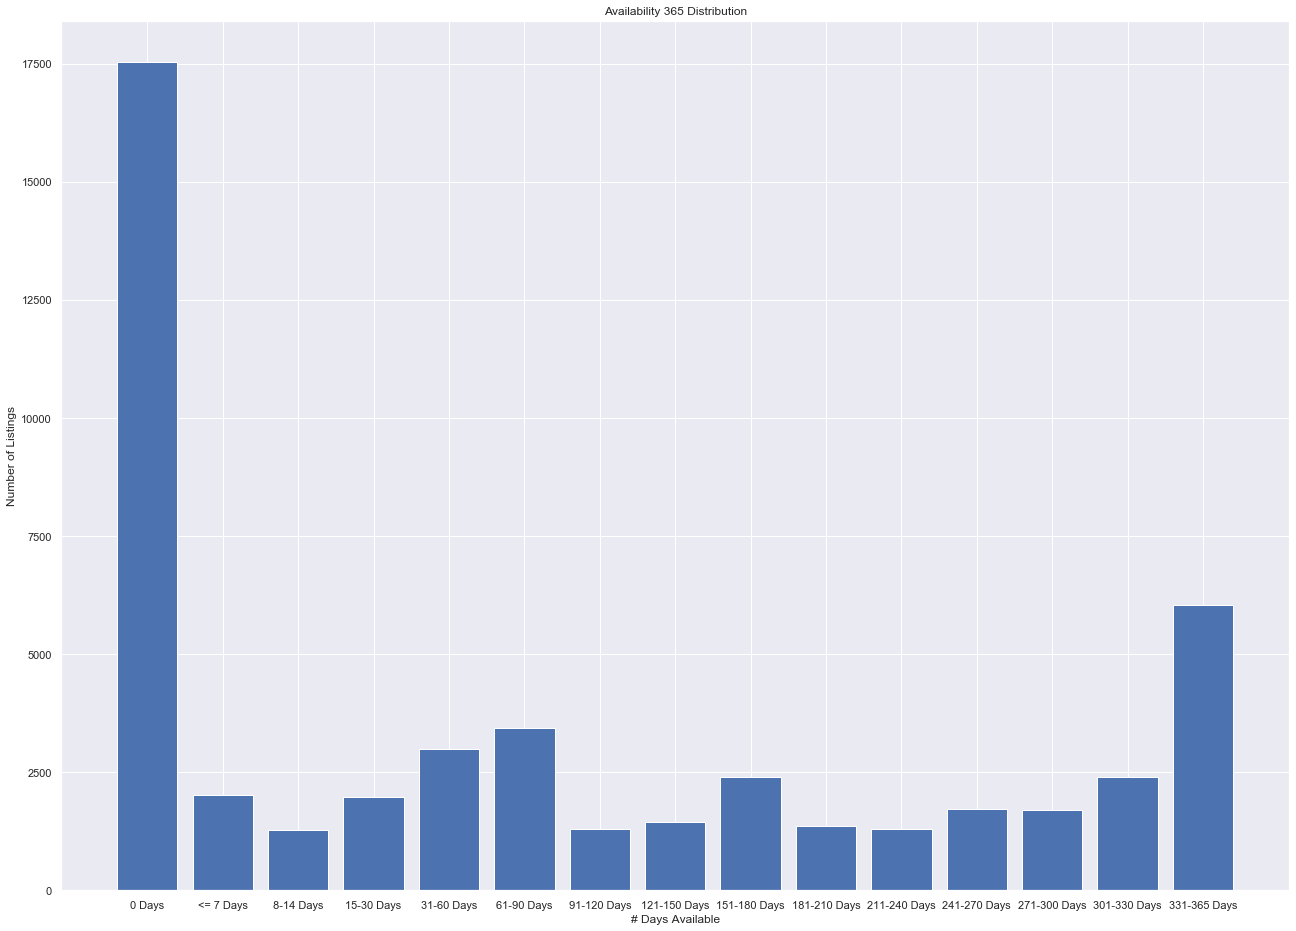

In [333]:
plt.figure(figsize=(22,16))

plt.bar(range(len(availability_365)), list(availability_365.values()))
plt.xticks(range(len(availability_365)), list(availability_365.keys()))
plt.ylabel('Number of Listings')
plt.xlabel('# Days Available')
plt.title('Availability 365 Distribution')

print(airb.availability_365.describe())
plt.show()

Clarification on what 0 Day Availability entails

## 4) Number of Reviews

In [8]:
number_of_reviews = {"0 Reviews":0, "1 Review":0, "2 Reviews":0,"3-5 Reviews":0, 
                      "6-10 Reviews":0,"11-20 Reviews":0, "21-30 Reviews":0, 
                     "31-50 Reviews":0, "51-100 Reviews":0, "Over 100 Reviews":0}

for value in airb['number_of_reviews']:
    if value == 0:
        number_of_reviews["0 Reviews"] += 1
    elif value == 1:
        number_of_reviews["1 Review"] += 1
    elif value == 2:
        number_of_reviews["2 Reviews"] += 1
    elif value > 2 and value <=5:
        number_of_reviews["3-5 Reviews"] += 1
    elif value > 5 and value <=10:
        number_of_reviews["6-10 Reviews"] += 1
    elif value > 10 and value <=20:
        number_of_reviews["11-20 Reviews"] += 1
    elif value > 20 and value <=30:
        number_of_reviews["21-30 Reviews"] += 1
    elif value > 30 and value <=50:
        number_of_reviews["31-50 Reviews"] += 1
    elif value >50 and value <=100:
        number_of_reviews["51-100 Reviews"] += 1
    else:
        number_of_reviews["Over 100 Reviews"] += 1
        
#print(number_of_reviews)

count    48895.000000
mean        23.274466
std         44.550582
min          0.000000
25%          1.000000
50%          5.000000
75%         24.000000
max        629.000000
Name: number_of_reviews, dtype: float64


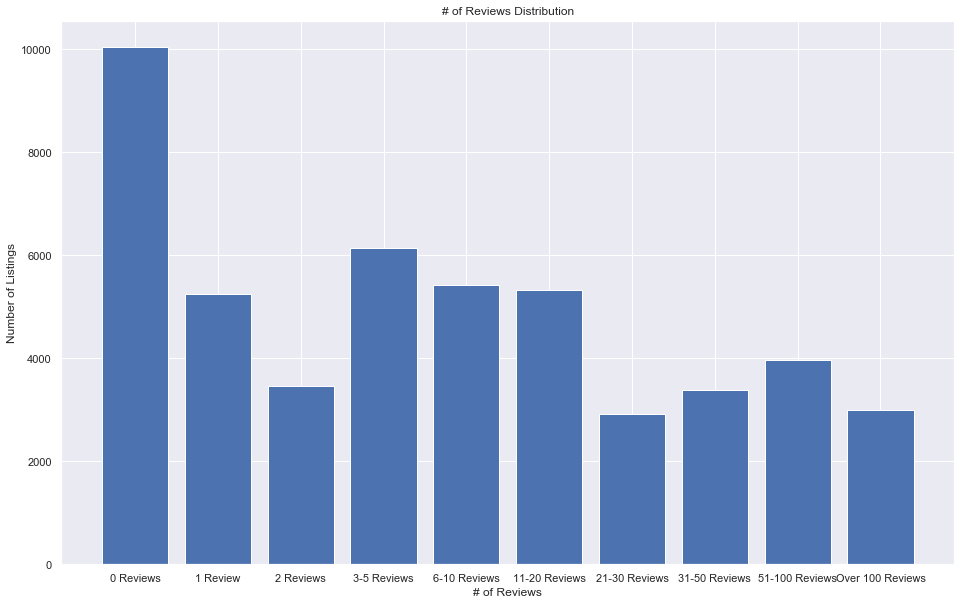

In [370]:
plt.figure(figsize=(16,10))

plt.bar(range(len(number_of_reviews)), list(number_of_reviews.values()))
plt.xticks(range(len(number_of_reviews)), list(number_of_reviews.keys()))
plt.ylabel('Number of Listings')
plt.xlabel('# of Reviews')
plt.title('# of Reviews Distribution')

print(airb.number_of_reviews.describe())
plt.show()

## 5) Reviews Per Month

In [4]:
reviews_per_month = {"<= 0.1 RPM":0, "0.1-0.25 RPM":0, "0.25-0.5 RPM":0,"0.5-1.0 RPM":0, 
              "1.0-2.0 RPM":0,"2.0-3.0 RPM":0, "3.0-4.0 RPM":0, "4.0-5.0 RPM":0, "> 5.0 RPM":0, "No RPM":0}

for value in airb['reviews_per_month']:
    if value <= 0.1:
        reviews_per_month["<= 0.1 RPM"] += 1
    elif value > 0.1 and value <= 0.25:
        reviews_per_month["0.1-0.25 RPM"] += 1
    elif value > 0.25 and value <= 0.5:
        reviews_per_month["0.25-0.5 RPM"] += 1
    elif value > 0.5 and value <= 1.0:
        reviews_per_month["0.5-1.0 RPM"] += 1
    elif value > 1.0 and value <=2.0:
        reviews_per_month["1.0-2.0 RPM"] += 1
    elif value > 2.0 and value <=3.0:
        reviews_per_month["2.0-3.0 RPM"] += 1
    elif value > 3.0 and value <=4.0:
        reviews_per_month["3.0-4.0 RPM"] += 1
    elif value > 4.0 and value <=5.0:
        reviews_per_month["4.0-5.0 RPM"] += 1
    elif value >5.0:
        reviews_per_month["> 5.0 RPM"] += 1
    else:
        reviews_per_month["No RPM"] += 1
        
#print(reviews_per_month)

count    38843.000000
mean         1.373221
std          1.680442
min          0.010000
25%          0.190000
50%          0.720000
75%          2.020000
max         58.500000
Name: reviews_per_month, dtype: float64


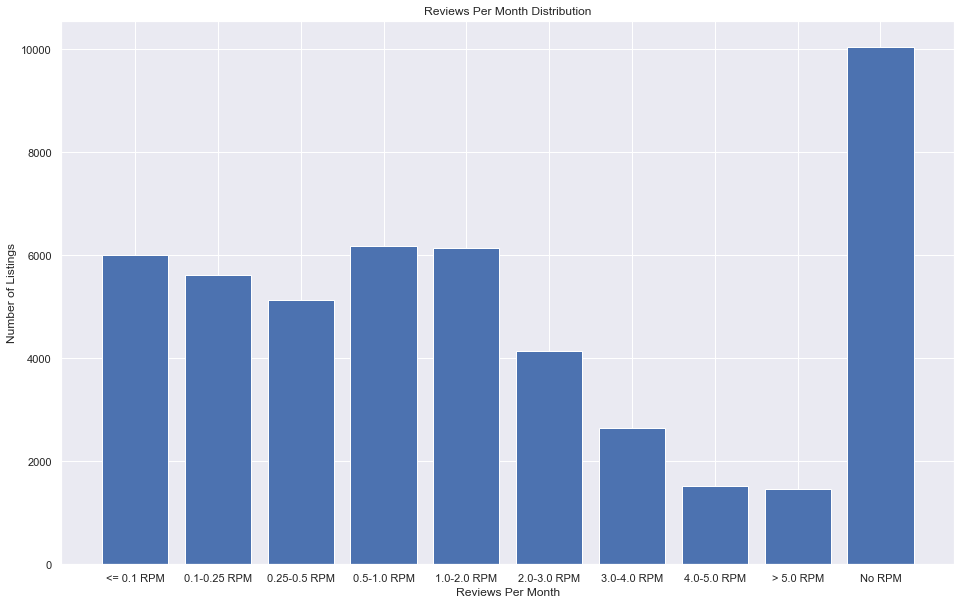

In [5]:
plt.figure(figsize=(16,10))

plt.bar(range(len(reviews_per_month)), list(reviews_per_month.values()))
plt.xticks(range(len(reviews_per_month)), list(reviews_per_month.keys()))
plt.ylabel('Number of Listings')
plt.xlabel('Reviews Per Month')
plt.title('Reviews Per Month Distribution')

print(airb.reviews_per_month.describe())
plt.show()

## 6) Room Type

count               48895
unique                  3
top       Entire home/apt
freq                25409
Name: room_type, dtype: object


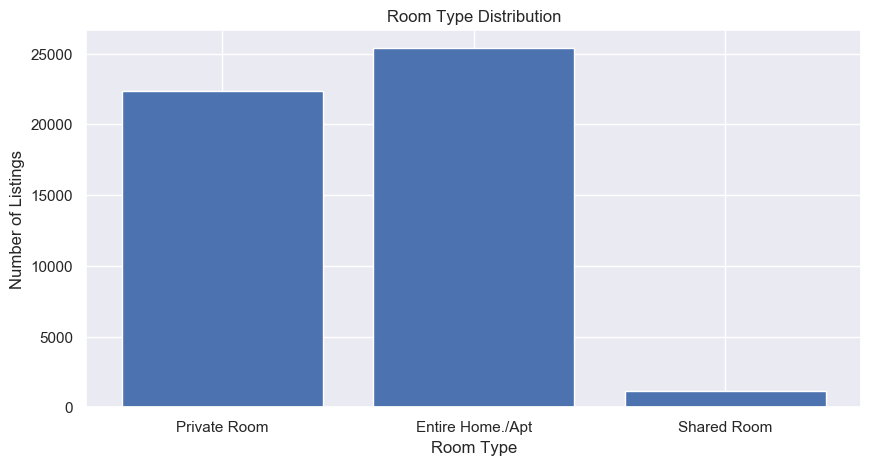

In [335]:
pvt_room, ent_home_apt, shared_room = 'Private room', 'Entire home/apt', 'Shared room'

pvt_room = airb.loc[airb['room_type'] == 'Private room'].count()[0]
ent_home_apt = airb.loc[airb['room_type'] == 'Entire home/apt'].count()[0]
shared_room = airb.loc[airb['room_type'] == 'Shared room'].count()[0]
housing = [pvt_room, ent_home_apt, shared_room]
labels=['Private Room', 'Entire Home./Apt', 'Shared Room']

plt.figure(figsize=(10,5), dpi=100)
plt.bar(labels, housing)
plt.ylabel('Number of Listings')
plt.xlabel('Room Type')
plt.title('Room Type Distribution')

print(airb.room_type.describe())
plt.show()

## 7) Neighbourhood Group

count         48895
unique            5
top       Manhattan
freq          21661
Name: neighbourhood_group, dtype: object


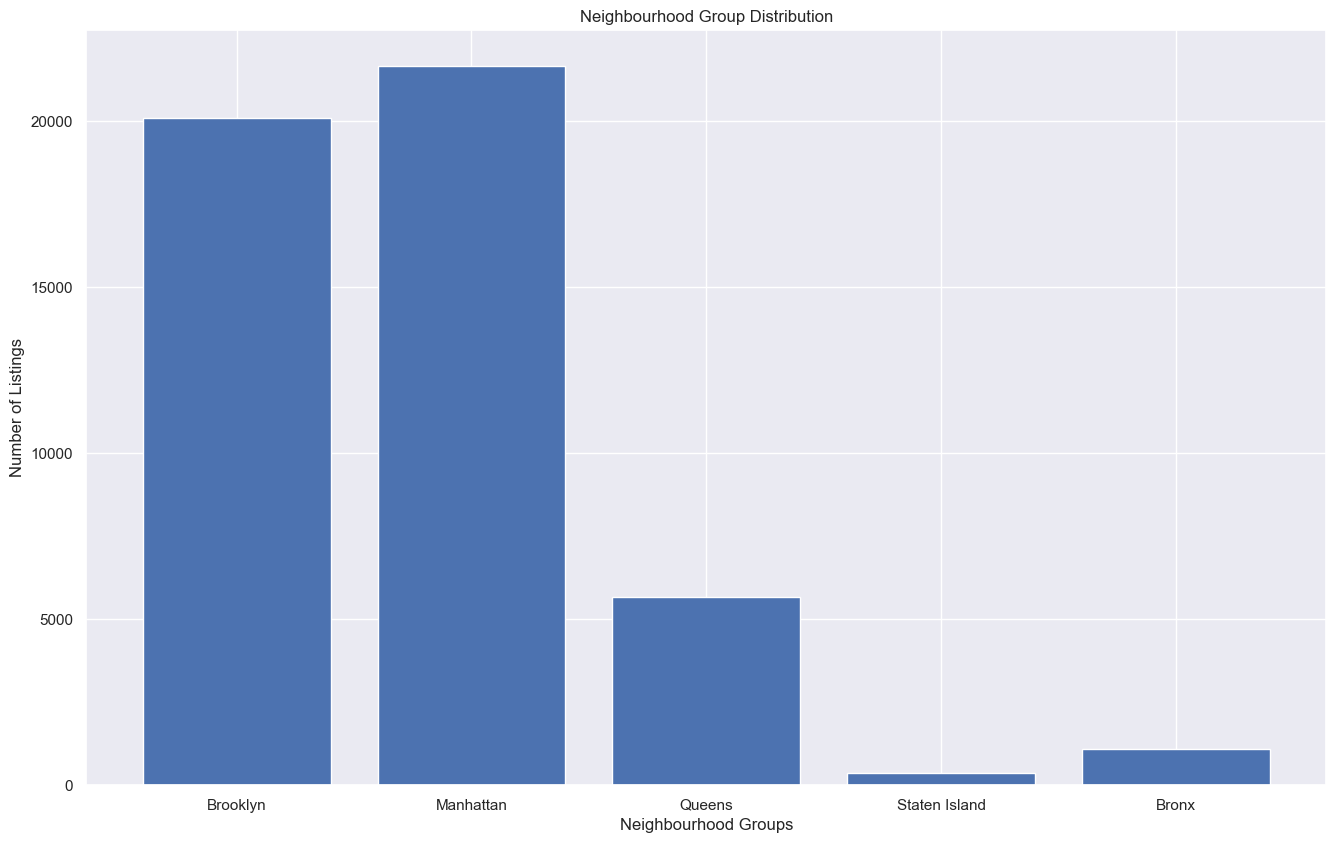

In [336]:
brooklyn = airb.loc[airb['neighbourhood_group'] == 'Brooklyn'].count()[0]
manhattan = airb.loc[airb['neighbourhood_group'] == 'Manhattan'].count()[0]
queens = airb.loc[airb['neighbourhood_group'] == 'Queens'].count()[0]
staten_island = airb.loc[airb['neighbourhood_group'] == 'Staten Island'].count()[0]
bronx = airb.loc[airb['neighbourhood_group'] == 'Bronx'].count()[0]

neighbourhood_group = [brooklyn, manhattan, queens, staten_island, bronx]
labels=['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']

plt.figure(figsize=(16,10), dpi=100)

plt.bar(labels, neighbourhood_group)
plt.ylabel('Number of Listings')
plt.xlabel('Neighbourhood Groups')
plt.title('Neighbourhood Group Distribution')

print(airb.neighbourhood_group.describe())
plt.show()

## 8) Room Type vs Price

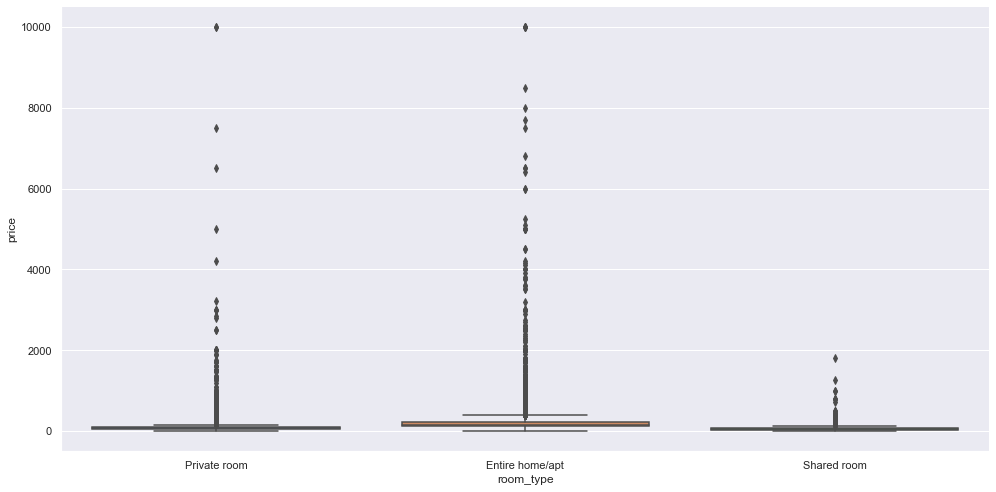

In [141]:
sns.catplot(
    data=airb,
    x='room_type',
    y='price',
    kind='box',
    height=7,
    aspect=2)

## 9)  Neighbourhood Group vs Price

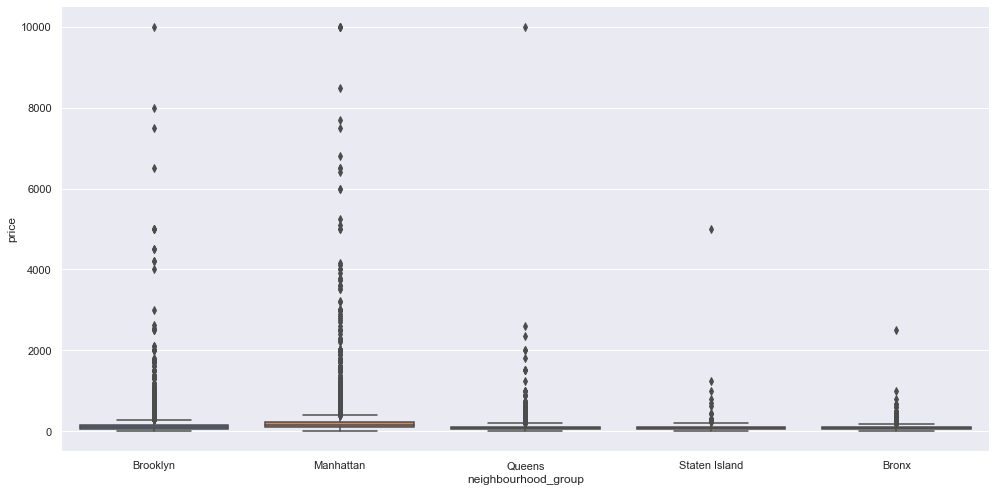

In [135]:
sns.catplot(
    data=airb,
    x='neighbourhood_group',
    y='price',
    kind='box',
    height=7,
    aspect=2)

## 10) Correlational Heatmap (Numerical features only)

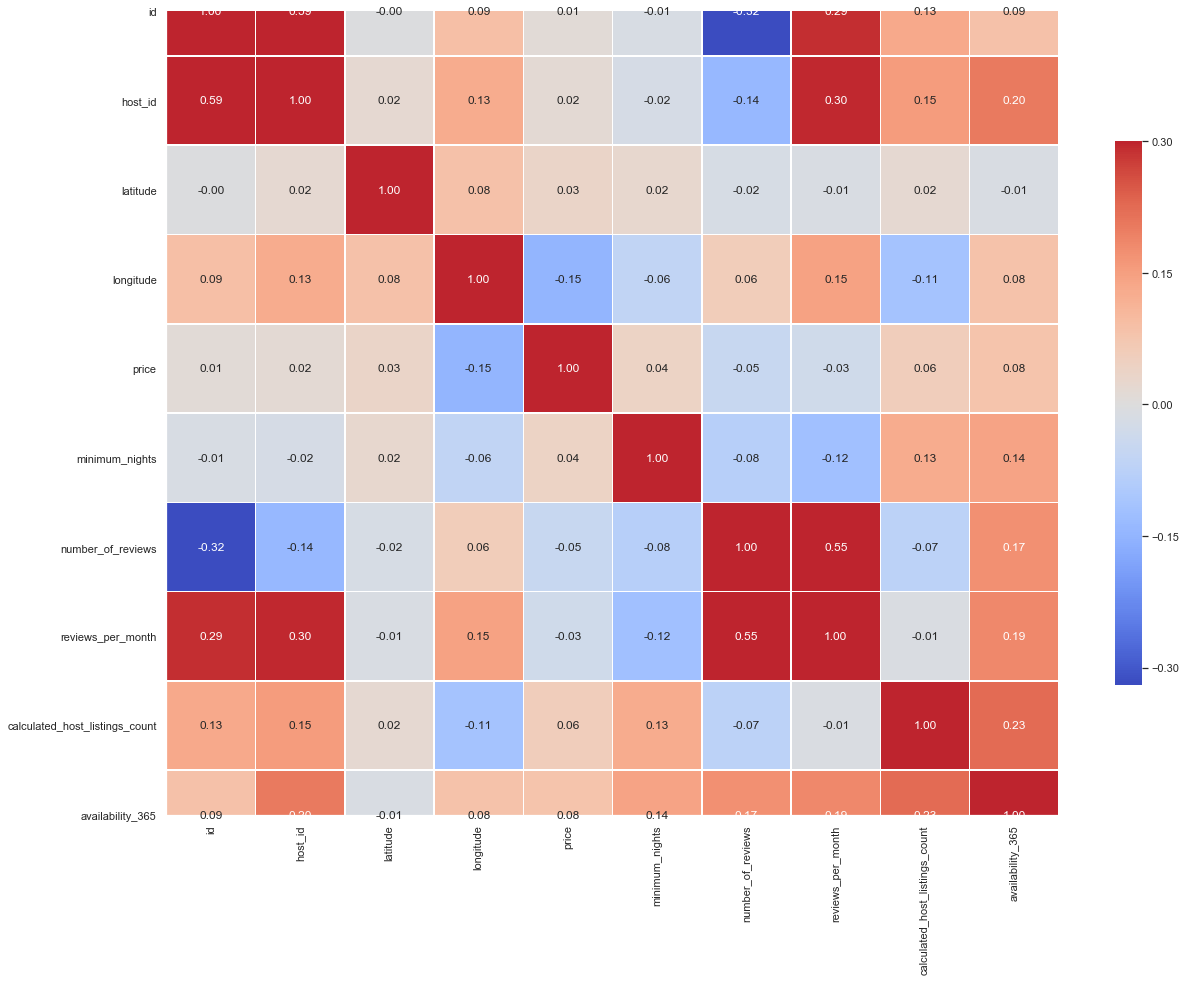

In [309]:
corr = airb.corr()
g = sns.heatmap(corr,  vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()
g.figure.set_size_inches(20,20)
    
plt.show()

# Data Cleaning

To starts to let's take a look at each of our features and get a count of how many are missing values.

In [4]:
# check for missing values
airb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

#### It appears that wehave four features with missing values.
#### Name and host_name are missing less than 25 values each, but we'll likely be dropping those columns anyway.
#### last_review and reviews_per_month are missing the same number of values, which probably means one is dependent on the other.
#### last_review can probably be dropped, but reviews_per_month can imputed with 0s as it is a numerical feature to begin with.

## Reviews Per Month

To clean up our reviews_per_month column we can fill all of our missing values with 0s.
Filling each with an average of the RPM column would likely lead to an inaccurate answer, so instead we will go with 0s.

In [5]:
airb[['last_review', 'reviews_per_month', 'number_of_reviews']]
## the observations with a number_of_reviews of 0 will have NaN
## in both last_review and reviews_per_month
## think it is safe to say we can impute with 0s

airb = airb.fillna({"reviews_per_month": 0})
airb[['reviews_per_month', 'last_review']]

,reviews_per_month,last_review
0,0.21,2018-10-19
1,0.38,2019-05-21
2,0.00,NaN
3,4.64,2019-07-05
4,0.10,2018-11-19
...,...,...
48890,0.00,NaN
48891,0.00,NaN
48892,0.00,NaN
48893,0.00,NaN


In [10]:
# let's drop the ID columns as they will not be able to present us with much more information.
# We'll also drop the last_review column as well.
#airb = airb.drop(['id'], axis = 1)
#airb = airb.drop(['host_id'], axis = 1)
#airb = airb.drop(['last_review'], axis = 1)
airb = airb.drop(['name'], axis = 1)
airb = airb.drop(['host_name'], axis = 1)

In [11]:
airb

,borough_code,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,1,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,2,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,1,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,2,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...
48890,1,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0.00,2,9
48891,1,Bushwick,40.70184,-73.93317,Private room,40,4,0,0.00,2,36
48892,2,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0.00,1,27
48893,2,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0.00,6,2


# Feature Engineering

In [13]:
#airb['neighbourhood_group'] = airb['neighbourhood_group'].replace(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],[1,2,3,4,5])
#airb.rename(columns={'neighbourhood_group':'borough_code'}, inplace=True)
airb.sample(3)

,borough_code,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
44622,2,Financial District,40.70641,-74.00674,Entire home/apt,130,29,0,0.00,327,337
16523,1,Bushwick,40.70238,-73.92812,Private room,55,1,1,0.03,1,0
35721,2,Kips Bay,40.74389,-73.98033,Private room,120,2,32,3.74,3,264


In [14]:
airb['room_type'] = airb['room_type'].replace(['Private room', 'Entire home/apt', 'Shared room'],[1,2,3])
airb.rename(columns={'room_type':'room_type_encoded'}, inplace=True)
airb.sample(5)

,borough_code,neighbourhood,latitude,longitude,room_type_encoded,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
26209,3,Long Island City,40.76096,-73.93836,1,55,4,0,0.00,1,0
22737,5,Parkchester,40.82942,-73.87564,1,60,2,89,3.36,4,30
13864,1,Williamsburg,40.71957,-73.94199,1,80,5,81,1.96,2,308
5119,1,Bushwick,40.69753,-73.93619,1,55,2,20,0.41,1,19
27377,2,Harlem,40.82397,-73.95453,1,55,11,124,6.10,6,95


In [15]:
airb.sample(5)

,borough_code,neighbourhood,latitude,longitude,room_type_encoded,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
5234,2,Upper West Side,40.79253,-73.97378,2,104,30,16,0.28,8,101
39643,1,Crown Heights,40.67188,-73.95049,2,85,3,0,0.00,2,0
45327,2,East Village,40.72757,-73.98336,2,150,31,0,0.00,1,365
17534,2,Upper East Side,40.77094,-73.95126,2,199,1,0,0.00,1,0
15714,2,Lower East Side,40.71187,-73.98878,3,35,14,0,0.00,28,318


In [ ]:
search = SearchEngine(simple_zipcode=True) # set simple_zipcode=False to use rich info database
zipcodes = []
latitudes = [lat for lat in airb.latitude]
longitudes = [long for long in airb.longitude]
#loc_tuple = (latitudes, longitudes)
#count = 0
for lat, long in zip(latitudes, longitudes):
    res = search.by_coordinates(lat, long, radius=10, returns=1)
    for zips in res:
        zipcodes.append(zips.zipcode)

airb["Zipcode"] = zipcodes